In [13]:
!pip install stopwords


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [56]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import matplotlib.font_manager as fm
from collections import Counter

In [16]:
# Set Hebrew font for matplotlib
hebrew_font_path = r"..\VarelaRound-Regular.ttf"
plt.rcParams['font.family'] = fm.FontProperties(fname=hebrew_font_path).get_name()

# Read the CSV file
df = pd.read_csv('reviews.csv')

In [17]:
# Display the first few rows of the DataFrame
df.head()

,institute,field,why,expectations,level,advice,rating_value
0,BGU,הנדסת תעשייה וניהול,מתוך עניין,תחומי עניין רבים בתואר. לפעמים חוסר הפרדה בין ...,סהכ מעניין קשה וטוב,ללמוד עם חברים למבחנים.,7
1,BGU,הנדסת תעשייה וניהול,רציתי ללמוד מערכות מידע אך לבסוף במקום להתמקד ...,התואר עצמו (התעודה) ענה על הציפיות שלי מההיבט ...,בסופו של דבר התואר נחשב בשוק העבודה בגלל השם ש...,"אם אתם לא נעולים על תחום ספציפי לכו ללמוד תעו""...",3
2,BGU,הנדסת תעשייה וניהול,מכיוון שזה מסלול נרחב וכללי אשר מאפשר בסיומו ל...,כפי שציינתי לומדים הרבה תחומים ולא מתמקצעים בא...,"תואר מגוון, אך נדרש רענון בסילבוס של הקורסים, ...",להסתכל על המקצועות הרווחים במשק שממלאים מהנדסי...,6
3,BGU,הנדסת תעשייה וניהול,"עניין, מידע רוחבי",מעולה,מספק מידע רחב אולי יותר מדי. עדיף לצמצם אולי א...,אין כזה דבר יותר מדי אלכוהול,8
4,BGU,הנדסת תעשייה וניהול,עבדתי בתפקיד דומה בצבא.,התחומים שנלמדו מאוד מעניינים עבורי,"התואר מאוד מעניין, נחשב מאוד בשוק ופותח הרבה ד...","אל תתייאשו מהמטלות הרבות שניתנות במהלך התואר, ...",8


In [18]:
# Basic data exploration
print("Number of rows: ", len(df))
print("Number of columns: ", len(df.columns))
print("\nData types:")
print(df.dtypes)

Number of rows:  2421
Number of columns:  7

Data types:
institute       object
field           object
why             object
expectations    object
level           object
advice          object
rating_value     int64
dtype: object


In [19]:
# Summary statistics
print("\nSummary statistics:")
print(df.describe())


Summary statistics:
       rating_value
count   2421.000000
mean       7.388269
std        1.678870
min        1.000000
25%        7.000000
50%        8.000000
75%        8.000000
max       10.000000


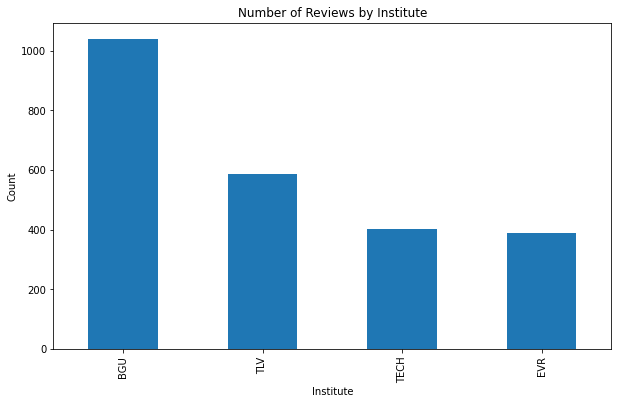

In [20]:
# Count plot of institutes
plt.figure(figsize=(10, 6))
df['institute'].value_counts().plot(kind='bar')
plt.title('Number of Reviews by Institute')
plt.xlabel('Institute')
plt.ylabel('Count')
plt.show()

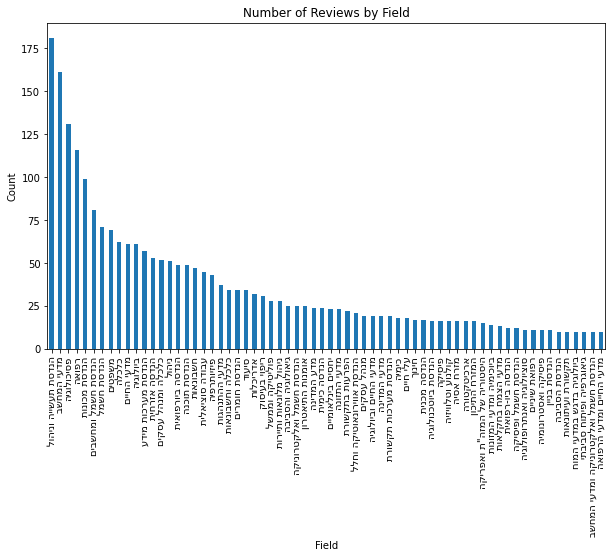

In [21]:
# Count plot of fields
plt.figure(figsize=(10, 6))
field_counts = df['field'].value_counts()
field_counts.plot(kind='bar')
plt.title('Number of Reviews by Field')
plt.xlabel('Field')
plt.ylabel('Count')

# Reverse the order of tick labels
plt.xticks(ticks=range(len(field_counts)), labels=field_counts.index.str[::-1], rotation='vertical')

plt.show()

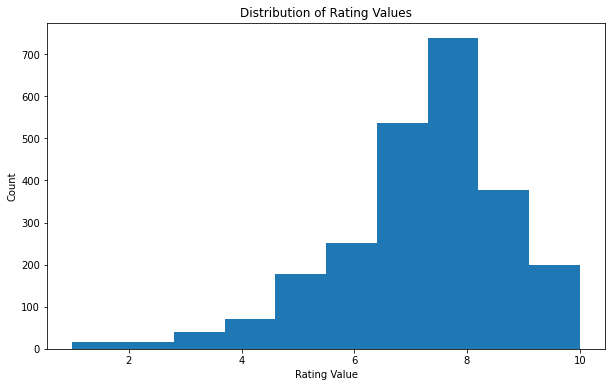

In [22]:
# Histogram of rating values
plt.figure(figsize=(10, 6))
df['rating_value'].plot(kind='hist', bins=10)
plt.title('Distribution of Rating Values')
plt.xlabel('Rating Value')
plt.ylabel('Count')
plt.show()

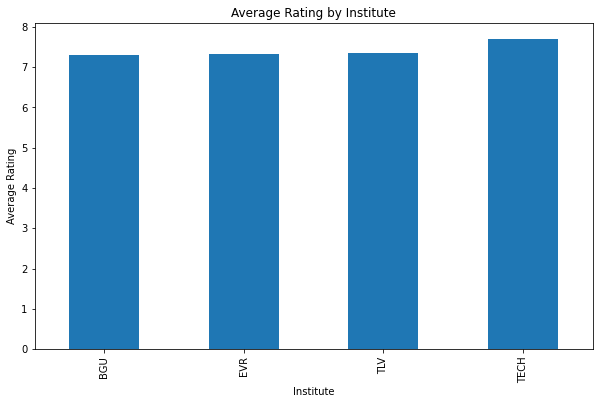

In [51]:
# Average rating by institute
avg_rating = df.groupby('institute')['rating_value'].mean()

# Bar plot
plt.figure(figsize=(10, 6))
avg_rating.sort_values().plot(kind='bar')
plt.title('Average Rating by Institute')
plt.xlabel('Institute')
plt.ylabel('Average Rating')
plt.show()

In [33]:
# Load Hebrew stop words from file
stopwords_file = 'heb_stopwords.txt'
with open(stopwords_file, 'r', encoding='utf-8') as f:
    stopwords = [line.strip() for line in f.readlines()]

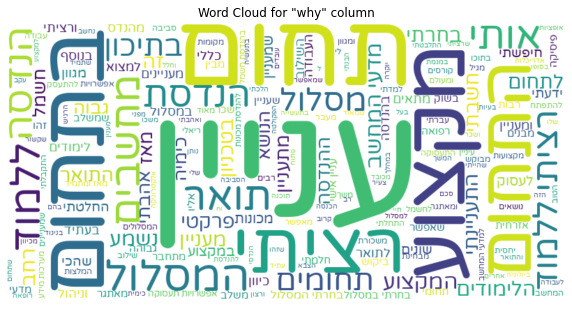

In [44]:
# Concatenate all the "expectations" text for the current institute
text = ' '.join(institute_data['why'].astype(str))  # Convert to string type
# Remove stopwords
text = ' '.join([word for word in text.split() if word not in stopwords])

text = text[::-1]

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path=hebrew_font_path).generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title(f'Word Cloud for "why" column')
plt.axis('off')
plt.show()

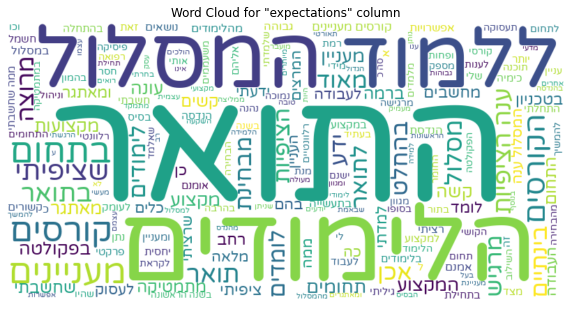

In [45]:
# Concatenate all the "why" text for the current institute and reverse the text
text = ' '.join(institute_data['expectations'].astype(str))  # Convert to string type
# Remove stopwords
text = ' '.join([word for word in text.split() if word not in stopwords])

text = text[::-1]

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path=hebrew_font_path).generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title(f'Word Cloud for "expectations" column')
plt.axis('off')
plt.show()

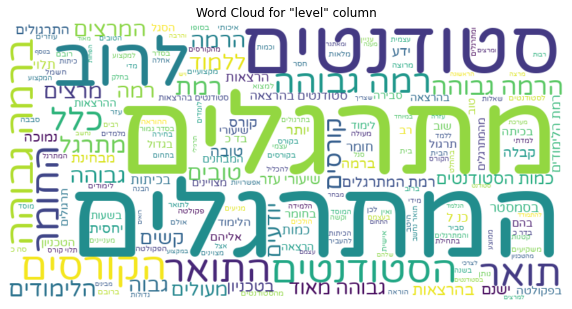

In [46]:
# Filter data for the current institute
institute_data = df[df['institute'] == institute]

# Concatenate all the "why" text for the current institute and reverse the text
text = ' '.join(institute_data['level'].astype(str))  # Convert to string type
# Remove stopwords
text = ' '.join([word for word in text.split() if word not in stopwords])

text = text[::-1]

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path=hebrew_font_path).generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title(f'Word Cloud for "level" column')
plt.axis('off')
plt.show()

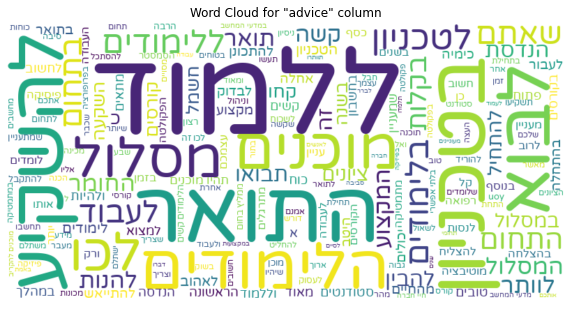

In [47]:
# Filter data for the current institute
institute_data = df[df['institute'] == institute]

# Concatenate all the "why" text for the current institute and reverse the text
text = ' '.join(institute_data['advice'].astype(str))  # Convert to string type
# Remove stopwords
text = ' '.join([word for word in text.split() if word not in stopwords])

text = text[::-1]

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path=hebrew_font_path).generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title(f'Word Cloud for "advice" column')
plt.axis('off')
plt.show()

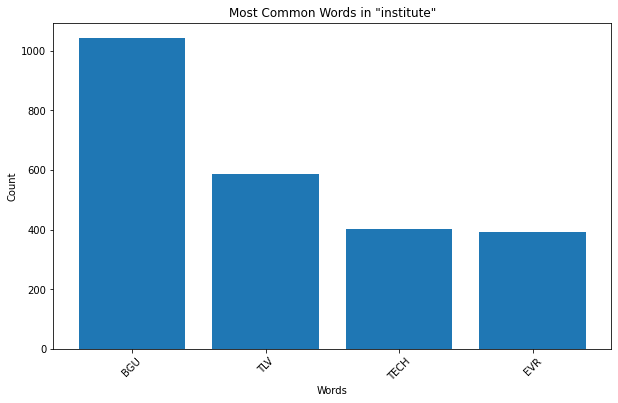

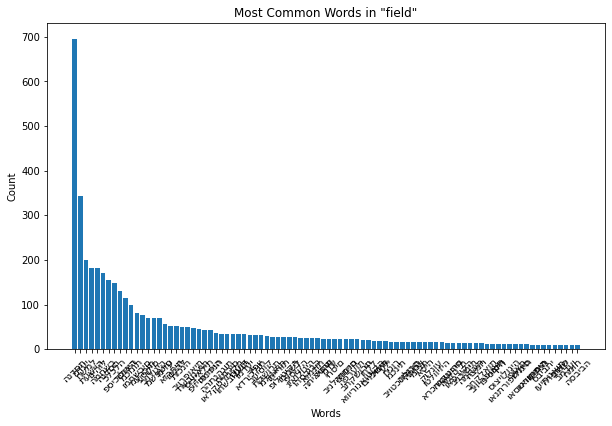

In [ ]:
# Remove stop words and count most common words for each column
word_counts = {}

for column in ['institute', 'field', 'why', 'expectations', 'advice']:
    text = ' '.join(df[column].astype(str))
    text = ' '.join([word for word in text.split() if word not in stopwords])
    words = text.split()
    word_counts[column] = dict(Counter(words).most_common())

# Plot most common words for each column
for column, counts in word_counts.items():
    words = list(counts.keys())
    counts = list(counts.values())

    plt.figure(figsize=(10, 6))
    plt.bar(words, counts)
    plt.title(f'Most Common Words in "{column}"')
    plt.xlabel('Words')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()